<a href="https://colab.research.google.com/github/cjvilla/Gold-Projections/blob/main/Code/LSTM_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
!pip install psycopg2-binary
import psycopg2

     |████████████████████████████████| 3.0MB 14.2MB/s 


In [2]:
engine = psycopg2.connect("dbname=gold_project user=gold host=gold-project.c58dxtfoq0r7.us-east-2.rds.amazonaws.com password=b00tcamp1! port=5432")

In [3]:
data = pd.read_sql_query('select * from final_gold_prediction_data', con=engine)
data.head()

,Year,Month,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
0,1979,1,9.3,86.239,227.290909,113.327273,1852.859091,197.018182,198.600000
1,1979,2,9.9,87.082,245.690000,122.555000,2010.370000,209.860000,216.650000
2,1979,3,10.1,87.280,242.063636,118.795455,1974.931818,204.359091,215.945455
3,1979,4,10.5,88.228,238.685714,115.138095,1956.809524,202.347619,215.414286
4,1979,5,10.9,89.270,257.800000,125.230435,2119.934783,217.695652,233.165217


In [4]:
data['Date'] = data.Month.astype(str) + '/' +  data.Year.astype(str)
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.date.apply(lambda x: x.strftime('%m/%Y'))
data.head()

,Year,Month,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar,Date
0,1979,1,9.3,86.239,227.290909,113.327273,1852.859091,197.018182,198.600000,01/1979
1,1979,2,9.9,87.082,245.690000,122.555000,2010.370000,209.860000,216.650000,02/1979
2,1979,3,10.1,87.280,242.063636,118.795455,1974.931818,204.359091,215.945455,03/1979
3,1979,4,10.5,88.228,238.685714,115.138095,1956.809524,202.347619,215.414286,04/1979
4,1979,5,10.9,89.270,257.800000,125.230435,2119.934783,217.695652,233.165217,05/1979


In [5]:
data = data[['Date', 'Inflation_Value', 'dollar_index', 'us_dollar', 'pound', 'indian_rupee', 'south_african_rand', 'australian_dollar']]
data.head()

,Date,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
0,01/1979,9.3,86.239,227.290909,113.327273,1852.859091,197.018182,198.600000
1,02/1979,9.9,87.082,245.690000,122.555000,2010.370000,209.860000,216.650000
2,03/1979,10.1,87.280,242.063636,118.795455,1974.931818,204.359091,215.945455
3,04/1979,10.5,88.228,238.685714,115.138095,1956.809524,202.347619,215.414286
4,05/1979,10.9,89.270,257.800000,125.230435,2119.934783,217.695652,233.165217


In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.date.apply(lambda x: x.strftime('%m/%Y'))
data.head()

,Date,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
0,01/1979,9.3,86.239,227.290909,113.327273,1852.859091,197.018182,198.600000
1,02/1979,9.9,87.082,245.690000,122.555000,2010.370000,209.860000,216.650000
2,03/1979,10.1,87.280,242.063636,118.795455,1974.931818,204.359091,215.945455
3,04/1979,10.5,88.228,238.685714,115.138095,1956.809524,202.347619,215.414286
4,05/1979,10.9,89.270,257.800000,125.230435,2119.934783,217.695652,233.165217


In [ ]:
data.describe()

,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,3.426016,96.293053,650.858709,415.494552,29235.003763,5083.917066,805.885658
std,2.743772,9.533460,429.747975,304.053857,30887.729820,5982.998765,484.813586
min,-2.100000,80.241000,227.290909,113.327273,1852.859091,197.018182,198.600000
25%,1.900000,88.565500,350.038204,215.271584,6126.209524,967.467857,473.653261
50%,2.800000,94.770000,408.948518,253.158696,12608.715580,1757.674285,545.252470
75%,3.900000,101.239000,1008.254546,652.835682,48354.394322,8342.231072,1228.076250
max,14.800000,128.437000,1771.854545,1233.081818,107869.247600,22746.936360,2219.166667


# **US Model**

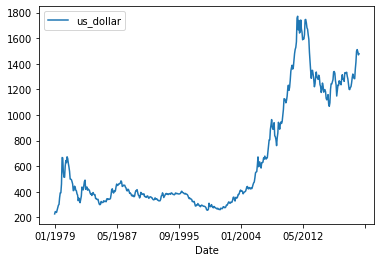

In [ ]:
data.plot('Date','us_dollar')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                492 non-null    datetime64[ns]
 1   Inflation_Value     492 non-null    float64       
 2   dollar_index        492 non-null    float64       
 3   us_dollar           492 non-null    float64       
 4   pound               492 non-null    float64       
 5   indian_rupee        492 non-null    float64       
 6   south_african_rand  492 non-null    float64       
 7   australian_dollar   492 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 30.9 KB


In [ ]:
data['Date']

0     1979-01-01
1     1979-02-01
2     1979-03-01
3     1979-04-01
4     1979-05-01
         ...    
487   2019-08-01
488   2019-09-01
489   2019-10-01
490   2019-11-01
491   2019-12-01
Name: Date, Length: 492, dtype: datetime64[ns]

In [ ]:
data = pd.DataFrame(data['us_dollar']).set_index(data['Date'])

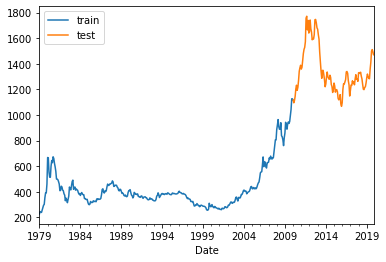

In [ ]:
time = pd.Timestamp('2010-1')
train = data.loc[:time,['us_dollar']]
test = data.loc[time:,['us_dollar']]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [ ]:
for s in range(0, 10):
    train['shift_{}'.format(s)] = train['us_dollar'].shift(s)
    test['shift_{}'.format(s)] = test['us_dollar'].shift(s)

train.head(10)

,us_dollar,shift_0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9
Date,,,,,,,,,,,
1979-01-01,227.290909,227.290909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-02-01,245.690000,245.690000,227.290909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-03-01,242.063636,242.063636,245.690000,227.290909,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-04-01,238.685714,238.685714,242.063636,245.690000,227.290909,NaN,NaN,NaN,NaN,NaN,NaN
1979-05-01,257.800000,257.800000,238.685714,242.063636,245.690000,227.290909,NaN,NaN,NaN,NaN,NaN
1979-06-01,279.085714,279.085714,257.800000,238.685714,242.063636,245.690000,227.290909,NaN,NaN,NaN,NaN
1979-07-01,294.763636,294.763636,279.085714,257.800000,238.685714,242.063636,245.690000,227.290909,NaN,NaN,NaN
1979-08-01,301.447826,301.447826,294.763636,279.085714,257.800000,238.685714,242.063636,245.690000,227.290909,NaN,NaN
1979-09-01,355.130000,355.130000,301.447826,294.763636,279.085714,257.800000,238.685714,242.063636,245.690000,227.290909,NaN


In [ ]:
X_train = train.dropna().drop('us_dollar', axis=1)
y_train = train.dropna()[['us_dollar']]

X_test = test.dropna().drop('us_dollar', axis=1)
y_test = test.dropna()[['us_dollar']]


X_train_t = X_train.values.reshape(X_train.values.shape[0], 10, 1)
X_test_t = X_test.values.reshape(X_test.values.shape[0], 10, 1)
X_train_t.shape

(364, 10, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation
import random as python_random
import tensorflow as tf

np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(LSTM(100, input_shape=(10,1), activation='gelu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics='mean_absolute_percentage_error')

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_t, y_train, epochs=1000, batch_size=128)

Epoch 1/1000
3/3 [==============================] - 0s 19ms/step - loss: 10.5319 - mean_absolute_percentage_error: 0.5190
Epoch 2/1000
3/3 [==============================] - 0s 19ms/step - loss: 8.7620 - mean_absolute_percentage_error: 0.4715
Epoch 3/1000
3/3 [==============================] - 0s 20ms/step - loss: 10.1389 - mean_absolute_percentage_error: 0.5142
Epoch 4/1000
3/3 [==============================] - 0s 22ms/step - loss: 13.7531 - mean_absolute_percentage_error: 0.6409
Epoch 5/1000
3/3 [==============================] - 0s 29ms/step - loss: 10.4401 - mean_absolute_percentage_error: 0.4768
Epoch 6/1000
3/3 [==============================] - 0s 21ms/step - loss: 11.1010 - mean_absolute_percentage_error: 0.5826
Epoch 7/1000
3/3 [==============================] - 0s 20ms/step - loss: 12.8276 - mean_absolute_percentage_error: 0.6117
Epoch 8/1000
3/3 [==============================] - 0s 27ms/step - loss: 15.3172 - mean_absolute_percentage_error: 0.6287
Epoch 9/1000
3/3 [=======

In [ ]:
 model.evaluate(X_test_t, y_test, batch_size=32)

4/4 [==============================] - 0s 4ms/step - loss: 159.0652 - mean_absolute_percentage_error: 0.6930


[159.0652313232422, 0.692970335483551]

In [ ]:
y_pred = model.predict(X_test_t, batch_size=32)
com = pd.DataFrame({'test' : y_test.us_dollar.values,
             'pred' : y_pred.reshape(-1)})

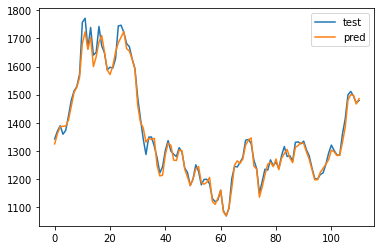

In [ ]:
ax = com.plot()
plt.legend(['test', 'pred'])

In [ ]:
arr = []
data = X_test_t[-1].reshape(-1)

for i in range(10):
    y_pred = model.predict(data.reshape(1,-1,1), batch_size=32)
    y_pred = y_pred.reshape(-1)[0]
    data = np.roll(data,1)
    arr.append(y_pred)
arr.insert(0, y_test.us_dollar[-1])
arr

[1478.645455,
 1504.1761,
 1298.4287,
 1303.1172,
 1303.0372,
 1365.7863,
 1420.5778,
 1522.1345,
 1534.9979,
 1518.3514,
 1493.765]

In [ ]:
X = []
X.append(pd.Timestamp('2019-12'))
for i in range(0,10):
    X.append(pd.Timestamp('202'+str(i)+'-12'))
X

[Timestamp('2019-12-01 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2021-12-01 00:00:00'),
 Timestamp('2022-12-01 00:00:00'),
 Timestamp('2023-12-01 00:00:00'),
 Timestamp('2024-12-01 00:00:00'),
 Timestamp('2025-12-01 00:00:00'),
 Timestamp('2026-12-01 00:00:00'),
 Timestamp('2027-12-01 00:00:00'),
 Timestamp('2028-12-01 00:00:00'),
 Timestamp('2029-12-01 00:00:00')]

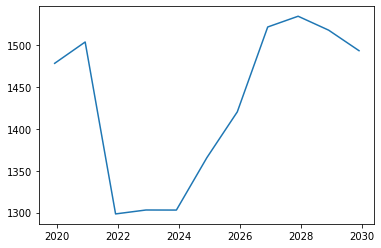

In [ ]:
plt.plot(X[:],arr[:])

In [ ]:
com.to_csv('/content/drive/MyDrive/Gold-Projections/LTSM_gold_data.csv')

# **UK Model**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Gold-Projections/celine-work/datetime_gold_predictions.csv')
data = data.drop(columns=['Unnamed: 0'])
data.head()

,Date,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
0,01/1979,9.3,86.239,227.290909,113.327273,1852.859091,197.018182,198.600000
1,02/1979,9.9,87.082,245.690000,122.555000,2010.370000,209.860000,216.650000
2,03/1979,10.1,87.280,242.063636,118.795455,1974.931818,204.359091,215.945455
3,04/1979,10.5,88.228,238.685714,115.138095,1956.809524,202.347619,215.414286
4,05/1979,10.9,89.270,257.800000,125.230435,2119.934783,217.695652,233.165217


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.date.apply(lambda x: x.strftime('%m/%Y'))
data.head()

,Date,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
0,01/1979,9.3,86.239,227.290909,113.327273,1852.859091,197.018182,198.600000
1,02/1979,9.9,87.082,245.690000,122.555000,2010.370000,209.860000,216.650000
2,03/1979,10.1,87.280,242.063636,118.795455,1974.931818,204.359091,215.945455
3,04/1979,10.5,88.228,238.685714,115.138095,1956.809524,202.347619,215.414286
4,05/1979,10.9,89.270,257.800000,125.230435,2119.934783,217.695652,233.165217


In [ ]:
data.describe()

,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,3.426016,96.293053,650.858709,415.494552,29235.003763,5083.917066,805.885658
std,2.743772,9.533460,429.747975,304.053857,30887.729820,5982.998765,484.813586
min,-2.100000,80.241000,227.290909,113.327273,1852.859091,197.018182,198.600000
25%,1.900000,88.565500,350.038204,215.271584,6126.209524,967.467857,473.653261
50%,2.800000,94.770000,408.948518,253.158696,12608.715580,1757.674285,545.252470
75%,3.900000,101.239000,1008.254546,652.835682,48354.394322,8342.231072,1228.076250
max,14.800000,128.437000,1771.854545,1233.081818,107869.247600,22746.936360,2219.166667


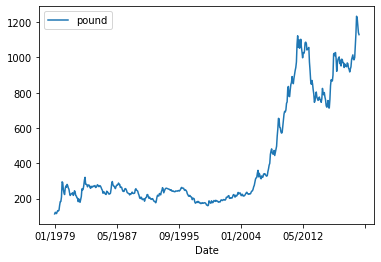

In [ ]:
data.plot('Date','pound')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                492 non-null    datetime64[ns]
 1   Inflation_Value     492 non-null    float64       
 2   dollar_index        492 non-null    float64       
 3   us_dollar           492 non-null    float64       
 4   pound               492 non-null    float64       
 5   indian_rupee        492 non-null    float64       
 6   south_african_rand  492 non-null    float64       
 7   australian_dollar   492 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 30.9 KB


In [ ]:
data['Date']

0     1979-01-01
1     1979-02-01
2     1979-03-01
3     1979-04-01
4     1979-05-01
         ...    
487   2019-08-01
488   2019-09-01
489   2019-10-01
490   2019-11-01
491   2019-12-01
Name: Date, Length: 492, dtype: datetime64[ns]

In [ ]:
data = pd.DataFrame(data['pound']).set_index(data['Date'])

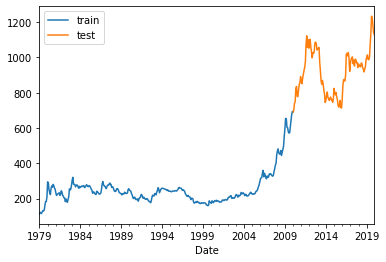

In [ ]:
time = pd.Timestamp('2010-1')
train = data.loc[:time,['pound']]
test = data.loc[time:,['pound']]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [ ]:
for s in range(0, 10):
    train['shift_{}'.format(s)] = train['pound'].shift(s)
    test['shift_{}'.format(s)] = test['pound'].shift(s)

train.head(10)

,pound,shift_0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9
Date,,,,,,,,,,,
1979-01-01,113.327273,113.327273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-02-01,122.555000,122.555000,113.327273,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-03-01,118.795455,118.795455,122.555000,113.327273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-04-01,115.138095,115.138095,118.795455,122.555000,113.327273,NaN,NaN,NaN,NaN,NaN,NaN
1979-05-01,125.230435,125.230435,115.138095,118.795455,122.555000,113.327273,NaN,NaN,NaN,NaN,NaN
1979-06-01,132.138095,132.138095,125.230435,115.138095,118.795455,122.555000,113.327273,NaN,NaN,NaN,NaN
1979-07-01,130.486364,130.486364,132.138095,125.230435,115.138095,118.795455,122.555000,113.327273,NaN,NaN,NaN
1979-08-01,134.760870,134.760870,130.486364,132.138095,125.230435,115.138095,118.795455,122.555000,113.327273,NaN,NaN
1979-09-01,161.630000,161.630000,134.760870,130.486364,132.138095,125.230435,115.138095,118.795455,122.555000,113.327273,NaN


In [ ]:
X_train = train.dropna().drop('pound', axis=1)
y_train = train.dropna()[['pound']]

X_test = test.dropna().drop('pound', axis=1)
y_test = test.dropna()[['pound']]


X_train_t = X_train.values.reshape(X_train.values.shape[0], 10, 1)
X_test_t = X_test.values.reshape(X_test.values.shape[0], 10, 1)
X_train_t.shape

(364, 10, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation
import random as python_random
import tensorflow as tf

np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(LSTM(100, input_shape=(10,1), activation='gelu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics='mean_absolute_percentage_error')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_t, y_train, epochs=1000, batch_size=128)

Epoch 1/1000
3/3 [==============================] - 0s 29ms/step - loss: 18.7385 - mean_absolute_percentage_error: 0.8661
Epoch 2/1000
3/3 [==============================] - 0s 34ms/step - loss: 20.5108 - mean_absolute_percentage_error: 0.9588
Epoch 3/1000
3/3 [==============================] - 0s 36ms/step - loss: 21.9803 - mean_absolute_percentage_error: 1.0942
Epoch 4/1000
3/3 [==============================] - 0s 35ms/step - loss: 21.5843 - mean_absolute_percentage_error: 0.9274
Epoch 5/1000
3/3 [==============================] - 0s 33ms/step - loss: 22.0232 - mean_absolute_percentage_error: 0.8388
Epoch 6/1000
3/3 [==============================] - 0s 31ms/step - loss: 30.5508 - mean_absolute_percentage_error: 1.3527
Epoch 7/1000
3/3 [==============================] - 0s 28ms/step - loss: 24.6392 - mean_absolute_percentage_error: 1.2375
Epoch 8/1000
3/3 [==============================] - 0s 27ms/step - loss: 23.2396 - mean_absolute_percentage_error: 1.1863
Epoch 9/1000
3/3 [======

In [ ]:
 model.evaluate(X_test_t, y_test, batch_size=32)

4/4 [==============================] - 0s 5ms/step - loss: 215.6828 - mean_absolute_percentage_error: 1.2644


[215.68276977539062, 1.2643834352493286]

In [ ]:
y_pred = model.predict(X_test_t, batch_size=32)
com = pd.DataFrame({'test' : y_test.pound.values,
             'pred' : y_pred.reshape(-1)})

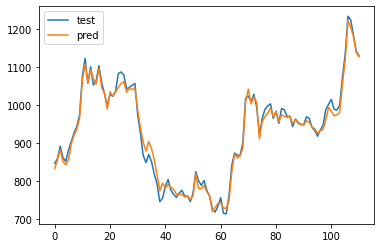

In [ ]:
ax = com.plot()
plt.legend(['test', 'pred'])

In [ ]:
arr = []
data = X_test_t[-1].reshape(-1)

for i in range(10):
    y_pred = model.predict(data.reshape(1,-1,1), batch_size=32)
    y_pred = y_pred.reshape(-1)[0]
    data = np.roll(data,1)
    arr.append(y_pred)
arr.insert(0, y_test.pound[-1])
arr

[1128.927273,
 1126.4657,
 1011.61224,
 1008.35803,
 1012.0983,
 1056.2692,
 1108.3971,
 1220.526,
 1225.2582,
 1184.9596,
 1108.7203]

In [ ]:
X = []
X.append(pd.Timestamp('2019-12'))
for i in range(0,10):
    X.append(pd.Timestamp('202'+str(i)+'-12'))
X

[Timestamp('2019-12-01 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2021-12-01 00:00:00'),
 Timestamp('2022-12-01 00:00:00'),
 Timestamp('2023-12-01 00:00:00'),
 Timestamp('2024-12-01 00:00:00'),
 Timestamp('2025-12-01 00:00:00'),
 Timestamp('2026-12-01 00:00:00'),
 Timestamp('2027-12-01 00:00:00'),
 Timestamp('2028-12-01 00:00:00'),
 Timestamp('2029-12-01 00:00:00')]

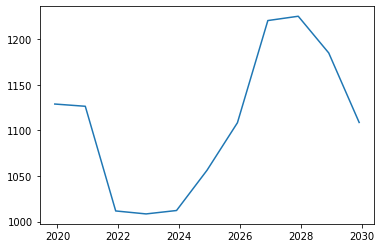

In [ ]:
plt.plot(X[:],arr[:])

In [ ]:
com.to_csv('/content/drive/MyDrive/Gold-Projections/uk_gold_predictions.csv')

# **Indian Model**

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Gold-Projections/celine-work/datetime_gold_predictions.csv')
data = data.drop(columns=['Unnamed: 0'])
data.head()

,Date,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
0,01/1979,9.3,86.239,227.290909,113.327273,1852.859091,197.018182,198.600000
1,02/1979,9.9,87.082,245.690000,122.555000,2010.370000,209.860000,216.650000
2,03/1979,10.1,87.280,242.063636,118.795455,1974.931818,204.359091,215.945455
3,04/1979,10.5,88.228,238.685714,115.138095,1956.809524,202.347619,215.414286
4,05/1979,10.9,89.270,257.800000,125.230435,2119.934783,217.695652,233.165217


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.date.apply(lambda x: x.strftime('%m/%Y'))
data.head()

,Date,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
0,01/1979,9.3,86.239,227.290909,113.327273,1852.859091,197.018182,198.600000
1,02/1979,9.9,87.082,245.690000,122.555000,2010.370000,209.860000,216.650000
2,03/1979,10.1,87.280,242.063636,118.795455,1974.931818,204.359091,215.945455
3,04/1979,10.5,88.228,238.685714,115.138095,1956.809524,202.347619,215.414286
4,05/1979,10.9,89.270,257.800000,125.230435,2119.934783,217.695652,233.165217


In [ ]:
data.describe()

,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,3.426016,96.293053,650.858709,415.494552,29235.003763,5083.917066,805.885658
std,2.743772,9.533460,429.747975,304.053857,30887.729820,5982.998765,484.813586
min,-2.100000,80.241000,227.290909,113.327273,1852.859091,197.018182,198.600000
25%,1.900000,88.565500,350.038204,215.271584,6126.209524,967.467857,473.653261
50%,2.800000,94.770000,408.948518,253.158696,12608.715580,1757.674285,545.252470
75%,3.900000,101.239000,1008.254546,652.835682,48354.394322,8342.231072,1228.076250
max,14.800000,128.437000,1771.854545,1233.081818,107869.247600,22746.936360,2219.166667


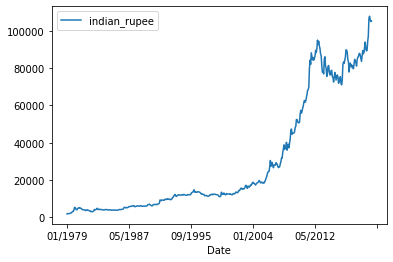

In [ ]:
data.plot('Date','indian_rupee')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                492 non-null    datetime64[ns]
 1   Inflation_Value     492 non-null    float64       
 2   dollar_index        492 non-null    float64       
 3   us_dollar           492 non-null    float64       
 4   pound               492 non-null    float64       
 5   indian_rupee        492 non-null    float64       
 6   south_african_rand  492 non-null    float64       
 7   australian_dollar   492 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 30.9 KB


In [ ]:
data['Date']

0     1979-01-01
1     1979-02-01
2     1979-03-01
3     1979-04-01
4     1979-05-01
         ...    
487   2019-08-01
488   2019-09-01
489   2019-10-01
490   2019-11-01
491   2019-12-01
Name: Date, Length: 492, dtype: datetime64[ns]

In [ ]:
data = pd.DataFrame(data['indian_rupee']).set_index(data['Date'])

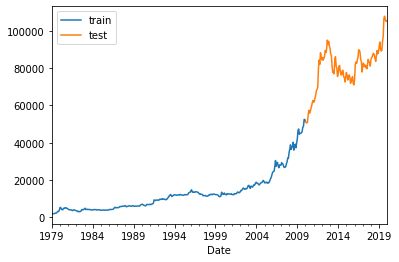

In [ ]:
time = pd.Timestamp('2010-1')
train = data.loc[:time,['indian_rupee']]
test = data.loc[time:,['indian_rupee']]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [ ]:
for s in range(0, 10):
    train['shift_{}'.format(s)] = train['indian_rupee'].shift(s)
    test['shift_{}'.format(s)] = test['indian_rupee'].shift(s)

train.head(10)

,indian_rupee,shift_0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9
Date,,,,,,,,,,,
1979-01-01,1852.859091,1852.859091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-02-01,2010.370000,2010.370000,1852.859091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-03-01,1974.931818,1974.931818,2010.370000,1852.859091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-04-01,1956.809524,1956.809524,1974.931818,2010.370000,1852.859091,NaN,NaN,NaN,NaN,NaN,NaN
1979-05-01,2119.934783,2119.934783,1956.809524,1974.931818,2010.370000,1852.859091,NaN,NaN,NaN,NaN,NaN
1979-06-01,2248.895238,2248.895238,2119.934783,1956.809524,1974.931818,2010.370000,1852.859091,NaN,NaN,NaN,NaN
1979-07-01,2309.700000,2309.700000,2248.895238,2119.934783,1956.809524,1974.931818,2010.370000,1852.859091,NaN,NaN,NaN
1979-08-01,2414.847826,2414.847826,2309.700000,2248.895238,2119.934783,1956.809524,1974.931818,2010.370000,1852.859091,NaN,NaN
1979-09-01,2865.035000,2865.035000,2414.847826,2309.700000,2248.895238,2119.934783,1956.809524,1974.931818,2010.370000,1852.859091,NaN


In [ ]:
X_train = train.dropna().drop('indian_rupee', axis=1)
y_train = train.dropna()[['indian_rupee']]

X_test = test.dropna().drop('indian_rupee', axis=1)
y_test = test.dropna()[['indian_rupee']]


X_train_t = X_train.values.reshape(X_train.values.shape[0], 10, 1)
X_test_t = X_test.values.reshape(X_test.values.shape[0], 10, 1)
X_train_t.shape

(364, 10, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation
import random as python_random
import tensorflow as tf

np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(LSTM(100, input_shape=(10,1), activation='gelu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics='mean_absolute_percentage_error')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_t, y_train, epochs=1000, batch_size=128)

Epoch 1/1000
3/3 [==============================] - 24s 35ms/step - loss: 169932312.0000 - mean_absolute_percentage_error: 77.4068
Epoch 2/1000
3/3 [==============================] - 0s 31ms/step - loss: 163285628.0000 - mean_absolute_percentage_error: 72.8141
Epoch 3/1000
3/3 [==============================] - 0s 31ms/step - loss: 142950288.0000 - mean_absolute_percentage_error: 71.0915
Epoch 4/1000
3/3 [==============================] - 0s 34ms/step - loss: 118006926.0000 - mean_absolute_percentage_error: 63.2815
Epoch 5/1000
3/3 [==============================] - 0s 32ms/step - loss: 115020522.0000 - mean_absolute_percentage_error: 60.5530
Epoch 6/1000
3/3 [==============================] - 0s 29ms/step - loss: 93307310.0000 - mean_absolute_percentage_error: 58.4976
Epoch 7/1000
3/3 [==============================] - 0s 31ms/step - loss: 73347772.0000 - mean_absolute_percentage_error: 52.0398
Epoch 8/1000
3/3 [==============================] - 0s 30ms/step - loss: 55223026.0000 - me

In [ ]:
 model.evaluate(X_test_t, y_test, batch_size=32)

4/4 [==============================] - 1s 7ms/step - loss: 3008611.2500 - mean_absolute_percentage_error: 1.6780


[3008611.25, 1.677950382232666]

In [ ]:
y_pred = model.predict(X_test_t, batch_size=32)
com = pd.DataFrame({'test' : y_test.indian_rupee.values,
             'pred' : y_pred.reshape(-1)})

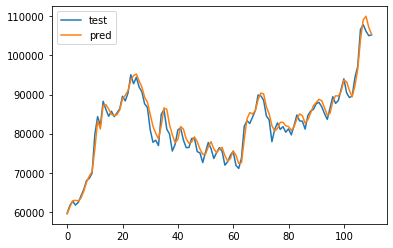

In [ ]:
ax = com.plot()
plt.legend(['test', 'pred'])

In [ ]:
arr = []
data = X_test_t[-1].reshape(-1)

for i in range(10):
    y_pred = model.predict(data.reshape(1,-1,1), batch_size=32)
    y_pred = y_pred.reshape(-1)[0]
    data = np.roll(data,1)
    arr.append(y_pred)
arr.insert(0, y_test.indian_rupee[-1])
arr

[105253.9591,
 105434.586,
 99002.37,
 94287.09,
 93639.71,
 92894.516,
 96619.98,
 104889.8,
 109940.125,
 110634.29,
 107652.14]

In [ ]:
X = []
X.append(pd.Timestamp('2019-12'))
for i in range(0,10):
    X.append(pd.Timestamp('202'+str(i)+'-12'))
X

[Timestamp('2019-12-01 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2021-12-01 00:00:00'),
 Timestamp('2022-12-01 00:00:00'),
 Timestamp('2023-12-01 00:00:00'),
 Timestamp('2024-12-01 00:00:00'),
 Timestamp('2025-12-01 00:00:00'),
 Timestamp('2026-12-01 00:00:00'),
 Timestamp('2027-12-01 00:00:00'),
 Timestamp('2028-12-01 00:00:00'),
 Timestamp('2029-12-01 00:00:00')]

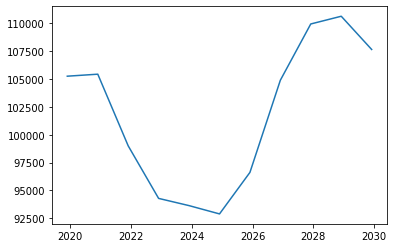

In [ ]:
plt.plot(X[:],arr[:])

In [ ]:
com.to_csv('/content/drive/MyDrive/Gold-Projections/LSTM_india.csv')

# **South Africa Model**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Gold-Projections/celine-work/datetime_gold_predictions.csv')
data = data.drop(columns=['Unnamed: 0'])
data.head()

,Date,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
0,01/1979,9.3,86.239,227.290909,113.327273,1852.859091,197.018182,198.600000
1,02/1979,9.9,87.082,245.690000,122.555000,2010.370000,209.860000,216.650000
2,03/1979,10.1,87.280,242.063636,118.795455,1974.931818,204.359091,215.945455
3,04/1979,10.5,88.228,238.685714,115.138095,1956.809524,202.347619,215.414286
4,05/1979,10.9,89.270,257.800000,125.230435,2119.934783,217.695652,233.165217


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.date.apply(lambda x: x.strftime('%m/%Y'))
data.head()

,Date,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
0,01/1979,9.3,86.239,227.290909,113.327273,1852.859091,197.018182,198.600000
1,02/1979,9.9,87.082,245.690000,122.555000,2010.370000,209.860000,216.650000
2,03/1979,10.1,87.280,242.063636,118.795455,1974.931818,204.359091,215.945455
3,04/1979,10.5,88.228,238.685714,115.138095,1956.809524,202.347619,215.414286
4,05/1979,10.9,89.270,257.800000,125.230435,2119.934783,217.695652,233.165217


In [ ]:
data.describe()

,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,3.426016,96.293053,650.858709,415.494552,29235.003763,5083.917066,805.885658
std,2.743772,9.533460,429.747975,304.053857,30887.729820,5982.998765,484.813586
min,-2.100000,80.241000,227.290909,113.327273,1852.859091,197.018182,198.600000
25%,1.900000,88.565500,350.038204,215.271584,6126.209524,967.467857,473.653261
50%,2.800000,94.770000,408.948518,253.158696,12608.715580,1757.674285,545.252470
75%,3.900000,101.239000,1008.254546,652.835682,48354.394322,8342.231072,1228.076250
max,14.800000,128.437000,1771.854545,1233.081818,107869.247600,22746.936360,2219.166667


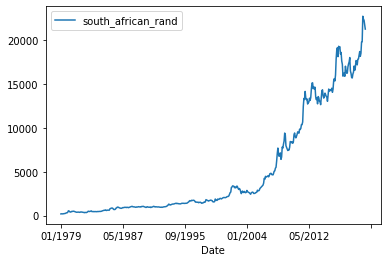

In [ ]:
data.plot('Date','south_african_rand')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                492 non-null    datetime64[ns]
 1   Inflation_Value     492 non-null    float64       
 2   dollar_index        492 non-null    float64       
 3   us_dollar           492 non-null    float64       
 4   pound               492 non-null    float64       
 5   indian_rupee        492 non-null    float64       
 6   south_african_rand  492 non-null    float64       
 7   australian_dollar   492 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 30.9 KB


In [ ]:
data['Date']

0     1979-01-01
1     1979-02-01
2     1979-03-01
3     1979-04-01
4     1979-05-01
         ...    
487   2019-08-01
488   2019-09-01
489   2019-10-01
490   2019-11-01
491   2019-12-01
Name: Date, Length: 492, dtype: datetime64[ns]

In [ ]:
data = pd.DataFrame(data['south_african_rand']).set_index(data['Date'])

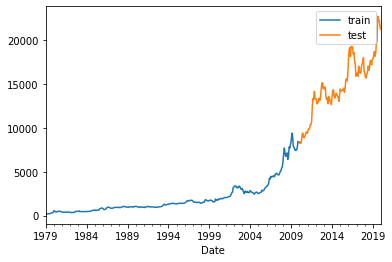

In [ ]:
time = pd.Timestamp('2010-1')
train = data.loc[:time,['south_african_rand']]
test = data.loc[time:,['south_african_rand']]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [ ]:
for s in range(0, 10):
    train['shift_{}'.format(s)] = train['south_african_rand'].shift(s)
    test['shift_{}'.format(s)] = test['south_african_rand'].shift(s)

train.head(10)

,south_african_rand,shift_0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9
Date,,,,,,,,,,,
1979-01-01,197.018182,197.018182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-02-01,209.860000,209.860000,197.018182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-03-01,204.359091,204.359091,209.860000,197.018182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-04-01,202.347619,202.347619,204.359091,209.860000,197.018182,NaN,NaN,NaN,NaN,NaN,NaN
1979-05-01,217.695652,217.695652,202.347619,204.359091,209.860000,197.018182,NaN,NaN,NaN,NaN,NaN
1979-06-01,235.580952,235.580952,217.695652,202.347619,204.359091,209.860000,197.018182,NaN,NaN,NaN,NaN
1979-07-01,248.522727,248.522727,235.580952,217.695652,202.347619,204.359091,209.860000,197.018182,NaN,NaN,NaN
1979-08-01,252.426087,252.426087,248.522727,235.580952,217.695652,202.347619,204.359091,209.860000,197.018182,NaN,NaN
1979-09-01,294.600000,294.600000,252.426087,248.522727,235.580952,217.695652,202.347619,204.359091,209.860000,197.018182,NaN


In [ ]:
X_train = train.dropna().drop('south_african_rand', axis=1)
y_train = train.dropna()[['south_african_rand']]

X_test = test.dropna().drop('south_african_rand', axis=1)
y_test = test.dropna()[['south_african_rand']]


X_train_t = X_train.values.reshape(X_train.values.shape[0], 10, 1)
X_test_t = X_test.values.reshape(X_test.values.shape[0], 10, 1)
X_train_t.shape

(364, 10, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation
import random as python_random
import tensorflow as tf

np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(LSTM(100, input_shape=(10,1), activation='gelu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics='mean_absolute_percentage_error')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_t, y_train, epochs=1000, batch_size=128)

Epoch 1/1000
3/3 [==============================] - 20s 29ms/step - loss: 4717396.3750 - mean_absolute_percentage_error: 77.3410
Epoch 2/1000
3/3 [==============================] - 0s 32ms/step - loss: 3886915.6875 - mean_absolute_percentage_error: 68.0808
Epoch 3/1000
3/3 [==============================] - 0s 25ms/step - loss: 2895717.2500 - mean_absolute_percentage_error: 59.3933
Epoch 4/1000
3/3 [==============================] - 0s 23ms/step - loss: 1906950.9375 - mean_absolute_percentage_error: 48.4725
Epoch 5/1000
3/3 [==============================] - 0s 23ms/step - loss: 1430199.4375 - mean_absolute_percentage_error: 39.0506
Epoch 6/1000
3/3 [==============================] - 0s 28ms/step - loss: 501472.9609 - mean_absolute_percentage_error: 22.6042
Epoch 7/1000
3/3 [==============================] - 0s 23ms/step - loss: 50173.1768 - mean_absolute_percentage_error: 7.4750
Epoch 8/1000
3/3 [==============================] - 0s 24ms/step - loss: 202334.7812 - mean_absolute_percen

In [ ]:
 model.evaluate(X_test_t, y_test, batch_size=32)

4/4 [==============================] - 1s 4ms/step - loss: 24944.1953 - mean_absolute_percentage_error: 0.8133


[24944.1953125, 0.8133123517036438]

In [ ]:
y_pred = model.predict(X_test_t, batch_size=32)
com = pd.DataFrame({'test' : y_test.south_african_rand.values,
             'pred' : y_pred.reshape(-1)})

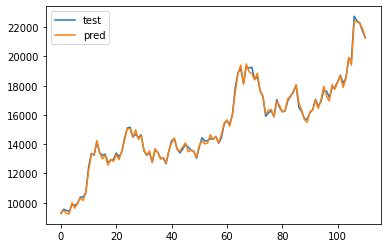

In [ ]:
ax = com.plot()
plt.legend(['test', 'pred'])

In [ ]:
arr = []
data = X_test_t[-1].reshape(-1)

for i in range(10):
    y_pred = model.predict(data.reshape(1,-1,1), batch_size=32)
    y_pred = y_pred.reshape(-1)[0]
    data = np.roll(data,1)
    arr.append(y_pred)
arr.insert(0, y_test.south_african_rand[-1])
arr

[21280.122730000006,
 21250.525,
 18948.008,
 18036.979,
 18750.441,
 19644.787,
 19455.887,
 22664.004,
 22541.047,
 22549.531,
 22088.96]

In [ ]:
X = []
X.append(pd.Timestamp('2019-12'))
for i in range(0,10):
    X.append(pd.Timestamp('202'+str(i)+'-12'))
X

[Timestamp('2019-12-01 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2021-12-01 00:00:00'),
 Timestamp('2022-12-01 00:00:00'),
 Timestamp('2023-12-01 00:00:00'),
 Timestamp('2024-12-01 00:00:00'),
 Timestamp('2025-12-01 00:00:00'),
 Timestamp('2026-12-01 00:00:00'),
 Timestamp('2027-12-01 00:00:00'),
 Timestamp('2028-12-01 00:00:00'),
 Timestamp('2029-12-01 00:00:00')]

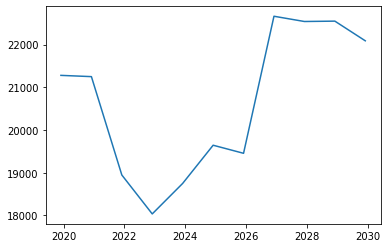

In [ ]:
plt.plot(X[:],arr[:])

In [ ]:
com.to_csv('/content/drive/MyDrive/Gold-Projections/LSTM_south_africa.csv')

# **Australia Model**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Gold-Projections/celine-work/datetime_gold_predictions.csv')
data = data.drop(columns=['Unnamed: 0'])
data.head()

,Date,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
0,01/1979,9.3,86.239,227.290909,113.327273,1852.859091,197.018182,198.600000
1,02/1979,9.9,87.082,245.690000,122.555000,2010.370000,209.860000,216.650000
2,03/1979,10.1,87.280,242.063636,118.795455,1974.931818,204.359091,215.945455
3,04/1979,10.5,88.228,238.685714,115.138095,1956.809524,202.347619,215.414286
4,05/1979,10.9,89.270,257.800000,125.230435,2119.934783,217.695652,233.165217


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date'] = data['Date'].dt.date.apply(lambda x: x.strftime('%m/%Y'))
data.head()

,Date,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
0,01/1979,9.3,86.239,227.290909,113.327273,1852.859091,197.018182,198.600000
1,02/1979,9.9,87.082,245.690000,122.555000,2010.370000,209.860000,216.650000
2,03/1979,10.1,87.280,242.063636,118.795455,1974.931818,204.359091,215.945455
3,04/1979,10.5,88.228,238.685714,115.138095,1956.809524,202.347619,215.414286
4,05/1979,10.9,89.270,257.800000,125.230435,2119.934783,217.695652,233.165217


In [ ]:
data.describe()

,Inflation_Value,dollar_index,us_dollar,pound,indian_rupee,south_african_rand,australian_dollar
count,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000,492.000000
mean,3.426016,96.293053,650.858709,415.494552,29235.003763,5083.917066,805.885658
std,2.743772,9.533460,429.747975,304.053857,30887.729820,5982.998765,484.813586
min,-2.100000,80.241000,227.290909,113.327273,1852.859091,197.018182,198.600000
25%,1.900000,88.565500,350.038204,215.271584,6126.209524,967.467857,473.653261
50%,2.800000,94.770000,408.948518,253.158696,12608.715580,1757.674285,545.252470
75%,3.900000,101.239000,1008.254546,652.835682,48354.394322,8342.231072,1228.076250
max,14.800000,128.437000,1771.854545,1233.081818,107869.247600,22746.936360,2219.166667


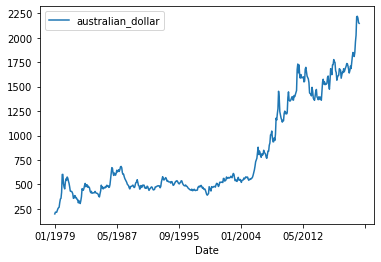

In [ ]:
data.plot('Date','australian_dollar')

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                492 non-null    datetime64[ns]
 1   Inflation_Value     492 non-null    float64       
 2   dollar_index        492 non-null    float64       
 3   us_dollar           492 non-null    float64       
 4   pound               492 non-null    float64       
 5   indian_rupee        492 non-null    float64       
 6   south_african_rand  492 non-null    float64       
 7   australian_dollar   492 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 30.9 KB


In [ ]:
data['Date']

0     1979-01-01
1     1979-02-01
2     1979-03-01
3     1979-04-01
4     1979-05-01
         ...    
487   2019-08-01
488   2019-09-01
489   2019-10-01
490   2019-11-01
491   2019-12-01
Name: Date, Length: 492, dtype: datetime64[ns]

In [ ]:
data = pd.DataFrame(data['australian_dollar']).set_index(data['Date'])

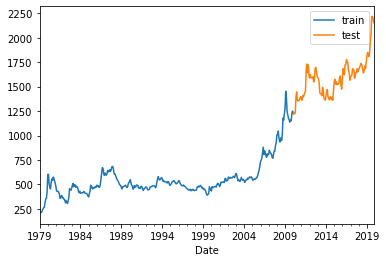

In [ ]:
time = pd.Timestamp('2010-1')
train = data.loc[:time,['australian_dollar']]
test = data.loc[time:,['australian_dollar']]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [ ]:
for s in range(0, 10):
    train['shift_{}'.format(s)] = train['australian_dollar'].shift(s)
    test['shift_{}'.format(s)] = test['australian_dollar'].shift(s)

train.head(10)

,australian_dollar,shift_0,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9
Date,,,,,,,,,,,
1979-01-01,198.600000,198.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-02-01,216.650000,216.650000,198.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-03-01,215.945455,215.945455,216.650000,198.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1979-04-01,215.414286,215.414286,215.945455,216.650000,198.600000,NaN,NaN,NaN,NaN,NaN,NaN
1979-05-01,233.165217,233.165217,215.414286,215.945455,216.650000,198.600000,NaN,NaN,NaN,NaN,NaN
1979-06-01,251.123809,251.123809,233.165217,215.414286,215.945455,216.650000,198.600000,NaN,NaN,NaN,NaN
1979-07-01,261.431818,261.431818,251.123809,233.165217,215.414286,215.945455,216.650000,198.600000,NaN,NaN,NaN
1979-08-01,267.152174,267.152174,261.431818,251.123809,233.165217,215.414286,215.945455,216.650000,198.600000,NaN,NaN
1979-09-01,314.715000,314.715000,267.152174,261.431818,251.123809,233.165217,215.414286,215.945455,216.650000,198.60,NaN


In [ ]:
X_train = train.dropna().drop('australian_dollar', axis=1)
y_train = train.dropna()[['australian_dollar']]

X_test = test.dropna().drop('australian_dollar', axis=1)
y_test = test.dropna()[['australian_dollar']]


X_train_t = X_train.values.reshape(X_train.values.shape[0], 10, 1)
X_test_t = X_test.values.reshape(X_test.values.shape[0], 10, 1)
X_train_t.shape

(364, 10, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Activation
import random as python_random
import tensorflow as tf

np.random.seed(42)
python_random.seed(42)
tf.random.set_seed(42)

model = Sequential()
model.add(LSTM(100, input_shape=(10,1), activation='gelu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics='mean_absolute_percentage_error')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train_t, y_train, epochs=1000, batch_size=128)

Epoch 1/1000
3/3 [==============================] - 21s 18ms/step - loss: 204579.5273 - mean_absolute_percentage_error: 76.1570
Epoch 2/1000
3/3 [==============================] - 0s 17ms/step - loss: 167650.0039 - mean_absolute_percentage_error: 67.4476
Epoch 3/1000
3/3 [==============================] - 0s 17ms/step - loss: 117269.8828 - mean_absolute_percentage_error: 56.6416
Epoch 4/1000
3/3 [==============================] - 0s 20ms/step - loss: 59670.0410 - mean_absolute_percentage_error: 39.2952
Epoch 5/1000
3/3 [==============================] - 0s 18ms/step - loss: 15799.6047 - mean_absolute_percentage_error: 17.2098
Epoch 6/1000
3/3 [==============================] - 0s 18ms/step - loss: 3904.9788 - mean_absolute_percentage_error: 8.5223
Epoch 7/1000
3/3 [==============================] - 0s 17ms/step - loss: 11135.5601 - mean_absolute_percentage_error: 17.4685
Epoch 8/1000
3/3 [==============================] - 0s 17ms/step - loss: 9915.0518 - mean_absolute_percentage_error:

In [ ]:
 model.evaluate(X_test_t, y_test, batch_size=32)

4/4 [==============================] - 1s 4ms/step - loss: 387.4511 - mean_absolute_percentage_error: 0.9083


[387.45111083984375, 0.9082752466201782]

In [ ]:
y_pred = model.predict(X_test_t, batch_size=32)
com = pd.DataFrame({'test' : y_test.australian_dollar.values,
             'pred' : y_pred.reshape(-1)})

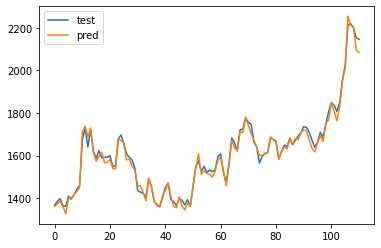

In [ ]:
ax = com.plot()
plt.legend(['test', 'pred'])

In [ ]:
arr = []
data = X_test_t[-1].reshape(-1)

for i in range(10):
    y_pred = model.predict(data.reshape(1,-1,1), batch_size=32)
    y_pred = y_pred.reshape(-1)[0]
    data = np.roll(data,1)
    arr.append(y_pred)
arr.insert(0, y_test.australian_dollar[-1])
arr

[2146.6,
 2084.2788,
 1864.3103,
 1904.9943,
 1848.4875,
 1911.9279,
 2011.7173,
 2268.589,
 2239.6018,
 2196.4937,
 2110.9011]

In [ ]:
X = []
X.append(pd.Timestamp('2019-12'))
for i in range(0,10):
    X.append(pd.Timestamp('202'+str(i)+'-12'))
X

[Timestamp('2019-12-01 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2021-12-01 00:00:00'),
 Timestamp('2022-12-01 00:00:00'),
 Timestamp('2023-12-01 00:00:00'),
 Timestamp('2024-12-01 00:00:00'),
 Timestamp('2025-12-01 00:00:00'),
 Timestamp('2026-12-01 00:00:00'),
 Timestamp('2027-12-01 00:00:00'),
 Timestamp('2028-12-01 00:00:00'),
 Timestamp('2029-12-01 00:00:00')]

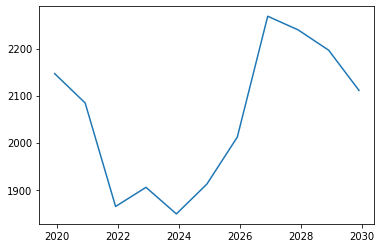

In [ ]:
plt.plot(X[:],arr[:])

In [ ]:
com.to_csv('/content/drive/MyDrive/Gold-Projections/LSTM_australia.csv')